
# Análisis comparativo ON vs OFF: Ajuste de distribuciones, Monte Carlo y evaluación de ajustes

Este notebook realiza un análisis estadístico completo entre dos conjuntos de datos:

- `z_on`: significancias medidas en regiones donde se espera señal (ON)
- `z_off`: significancias en regiones sin señal esperada (OFF)

### Qué se incluye:
- Conversión de significancias a p-valores con varias distribuciones (Normal, t, Gumbel)
- Comparación ON/OFF con test de Fisher
- Ajustes paramétricos con `curve_fit` **teniendo en cuenta el binning**
- Visualización de histogramas y PDFs ajustadas
- Cálculo de residuos
- Evaluación con prueba de Kolmogorov-Smirnov (KS)
- Simulación de Monte Carlo para distribución nula empírica de Fisher

> ⚠️ Reemplaza `z_on` y `z_off` por tus datos reales antes de ejecutar.

---

In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gumbel_r, chi2, kstest
from scipy.optimize import curve_fit


(array([0.00858409, 0.        , 0.03433637, 0.00858409, 0.42920466,
        0.3777001 , 0.30902736, 0.2575228 , 0.11159321, 0.01716819]),
 array([-2.91616247, -2.27254622, -1.62892998, -0.98531373, -0.34169748,
         0.30191876,  0.94553501,  1.58915126,  2.23276751,  2.87638375,
         3.52      ]),
 <BarContainer object of 10 artists>)

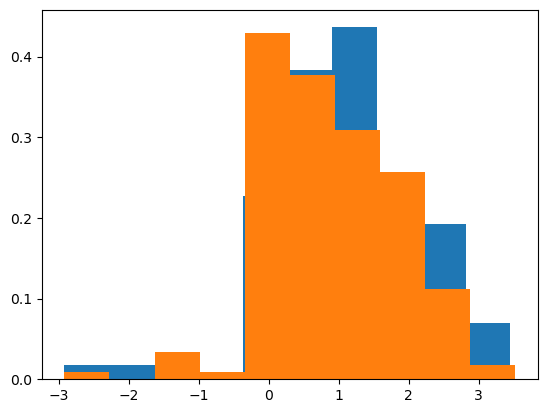

In [17]:
source_on=[0.27652459081559916, 1.1802728757073235, -1.119599012783303, -1.9960433641517563, 0.40100275333575064, -2.9161624719406802, 1.6099999999999999, 2.3100000000000014, 0.65, -0.0, 0.5799999999999998, 1.5800000000000007, -0.0, 2.549999999999998, 2.2200000000000015, 0.66, 2.7200000000000046, 1.0499999999999998, 1.0499999999999998, 1.4399999999999997, 2.0599999999999996, 0.2700000000000002, 1.0599999999999998, 0.38000000000000006, 0.8999999999999999, 1.9300000000000006, -0.0, 0.52, 1.7499999999999996, 1.0999999999999999, 0.059999999999999984, 2.8700000000000054, 0.2700000000000002, -0.0, 1.0099999999999996, 0.8300000000000002, 1.6000000000000003, 0.2700000000000002, 0.7100000000000001, -0.0, 0.84, 0.36999999999999994, 0.09333357287547434, 1.4797347826972556, 0.9848906128231127, 0.5058460775322822, 1.1032209558140882, 0.615972362625652, 2.3420162866669525, 0.983843138577162, -0.011783580173950953, 1.8499999999999994, 0.6000000000000001, 1.0, 0.2700000000000002, 2.8999999999999986, 0.98, -0.0, 2.21, 0.7799999999999999, 1.12, 2.1900000000000017, 2.9700000000000033, 0.7400000000000003, 2.0599999999999996, 1.0200000000000002, 1.92, 1.2200000000000002, 1.2300000000000006, 0.9200000000000002, -0.0, 0.9300000000000003, 2.02, 2.1799999999999997, 1.7700000000000005, 3.4499999999999553, -0.0, 2.200000000000001, 1.2200000000000002, -0.0, 1.2499999999999993, 1.2599999999999998, 2.479999999999997, 2.5099999999999976, 1.9500000000000006, 0.55, 1.2200000000000002, -0.0, 1.3000000000000003, 1.3400000000000007]
source_off=[-0.315462320077994, 0.10562479570160573, -0.4393761917903936, 1.562227530050139, -0.27282879992649656, 0.9538774294396265, 0.0, -2.7900000000000045, -0.3500000000000001, -1.62, -0.64, 0.0, -1.03, -1.6000000000000003, -0.1200000000000001, -1.939999999999999, 0.0, 0.0, -1.1299999999999997, 0.0, -2.0000000000000004, -0.9200000000000002, -1.03, -1.3999999999999997, -2.42, 0.0, -0.23000000000000015, -0.8899999999999998, -0.9700000000000002, -2.150000000000001, -0.8500000000000001, 0.0, -0.8300000000000002, -1.4399999999999997, -1.2200000000000002, -2.1100000000000003, -1.8000000000000003, -1.4800000000000004, 0.0, -0.09000000000000011, -2.1200000000000014, -1.2499999999999993, -1.19, -0.3400000000000001, -1.1299999999999997, 0.0, -1.7899999999999998, -1.1399999999999997, 0.0, -0.53, 0.0, -0.9399999999999998, -0.5799999999999998, -1.5100000000000002, -1.3400000000000007, 0.0, -0.8099999999999999, -0.4100000000000001, -0.8200000000000001, -1.1600000000000001, -0.91, -0.23000000000000015, -0.98, 0.0, -1.81, -1.4100000000000006, -2.4499999999999984, 0.0, -2.779999999999998, 0.0, -3.520000000000042, -1.2200000000000002, -0.23000000000000015, -1.7100000000000006, -1.6600000000000006, 0.0, -0.8500000000000001, -1.64, -1.6000000000000003, -0.2399999999999999, -1.0099999999999996, -0.6900000000000001, -1.5600000000000003, -0.9300000000000003, 1.0545476434433108, -1.0829569553084208, -0.3024955660669279, 0.12985722972900185, -0.7417859291585546, 1.491158928100927, -0.3532036559596059, 2.9161624719406802, 1.4370830037397624, -2.3299999999999996, -0.96, -1.9699999999999995, -0.8200000000000001, 0.0, 0.0, -0.21999999999999992, 0.0, 0.0, -2.4700000000000015, -1.7800000000000005, -2.32, 0.0, -0.64, -0.7499999999999999, 0.0, 0.0, -1.3699999999999997, -2.68, -0.36999999999999994, -1.35, -0.9500000000000002, -0.8899999999999998, -0.2399999999999999, -0.96, -0.24999999999999997, -0.31000000000000005, -0.3500000000000001, -2.360000000000001, -0.4100000000000001, -0.7400000000000003, -2.700000000000005, 0.0, 0.0, -2.200000000000001, 0.0, -2.1399999999999992, -0.3500000000000001, -0.3400000000000001, -2.2399999999999993, -2.5899999999999967, -0.050000000000000065, -1.7800000000000005, 0.0, -0.050000000000000065, 0.0, -0.6700000000000002, -1.6699999999999997, -0.8899999999999998, -1.2599999999999998, -0.36000000000000015, -0.36000000000000015, -2.21, -1.83, -1.7000000000000004, -1.17, 0.0, -0.7699999999999998, -1.92, -1.5900000000000005, -1.4999999999999996, -1.1799999999999997, -1.64, 0.0, -1.3900000000000001, -0.8000000000000002, -1.2800000000000002, -2.9700000000000033, 0.0, -1.3999999999999997, -0.23000000000000015, -0.8899999999999998, -0.3500000000000001, -0.7100000000000001, -1.5399999999999996, -1.8000000000000003, -0.8599999999999998, -2.3799999999999994, -0.5100000000000001, 0.0, -1.31, -1.8000000000000003, -0.28000000000000014, -1.62, -1.0, -1.6099999999999999, 0.0, -0.059999999999999984]
z_on = np.array(source_on)
z_off =- np.array(source_off)
plt.hist(z_on,density=True)
plt.hist(z_off,density=True)

In [18]:
p_val=0.16
trials_factor=1
p_corr = np.power(p_val, trials_factor)
sig_corr = norm.isf(p_corr)
sig_corr

0.994457883209753

In [19]:

def fit_and_get_pvals(z, dist):
    params = dist.fit(z)
    return 1 - dist.cdf(z, *params), params

def fisher_stat(pvals):
    chi2_val = -2 * np.sum(np.log(pvals))
    p_comb = 1 - chi2.cdf(chi2_val, 2 * len(pvals))
    sigma = norm.isf(p_comb)
    return chi2_val, p_comb, sigma


In [20]:

# Comparación ON vs OFF usando distintas distribuciones
dists = {"Normal": norm, "t-Student": t, "Gumbel": gumbel_r}
resultados = []

for name, dist in dists.items():
    pvals_on, _ = fit_and_get_pvals(z_on, dist)
    pvals_off, _ = fit_and_get_pvals(z_off, dist)
    chi2_on, p_on, sig_on = fisher_stat(pvals_on)
    chi2_off, p_off, sig_off = fisher_stat(pvals_off)
    resultados.append({
        "Distribución": name,
        "Chi² ON": chi2_on, "p_comb ON": p_on, "σ ON": sig_on,
        "Chi² OFF": chi2_off, "p_comb OFF": p_off, "σ OFF": sig_off
    })

pd.DataFrame(resultados)


,Distribución,Chi² ON,p_comb ON,σ ON,Chi² OFF,p_comb OFF,σ OFF
0,Normal,176.296605,0.564085,-0.161335,360.063655,0.518864,-0.047302
1,t-Student,178.865643,0.509872,-0.024748,363.576187,0.466821,0.083264
2,Gumbel,147.412291,0.963912,-1.798010,303.662633,0.988450,-2.271773


In [21]:

from scipy.stats import lognorm, gamma, beta

# Agregamos distribuciones adicionales al análisis
dists.update({
    "Lognormal": lognorm,
    "Gamma": gamma
    # Nota: Beta requiere valores en [0,1], no se incluye directamente a menos que los datos se transformen
})


<function normal_pdf at 0x7f17055a9da0>
<function student_pdf at 0x7f17055ab600>
<function gumbel_pdf at 0x7f17055abb00>
<function lognormal_pdf at 0x7f17056deb60>
<function gamma_pdf at 0x7f17056dec00>
<function normal_pdf at 0x7f17055a9da0>
<function student_pdf at 0x7f17055ab600>
<function gumbel_pdf at 0x7f17055abb00>
<function lognormal_pdf at 0x7f17056deb60>
<function gamma_pdf at 0x7f17056dec00>


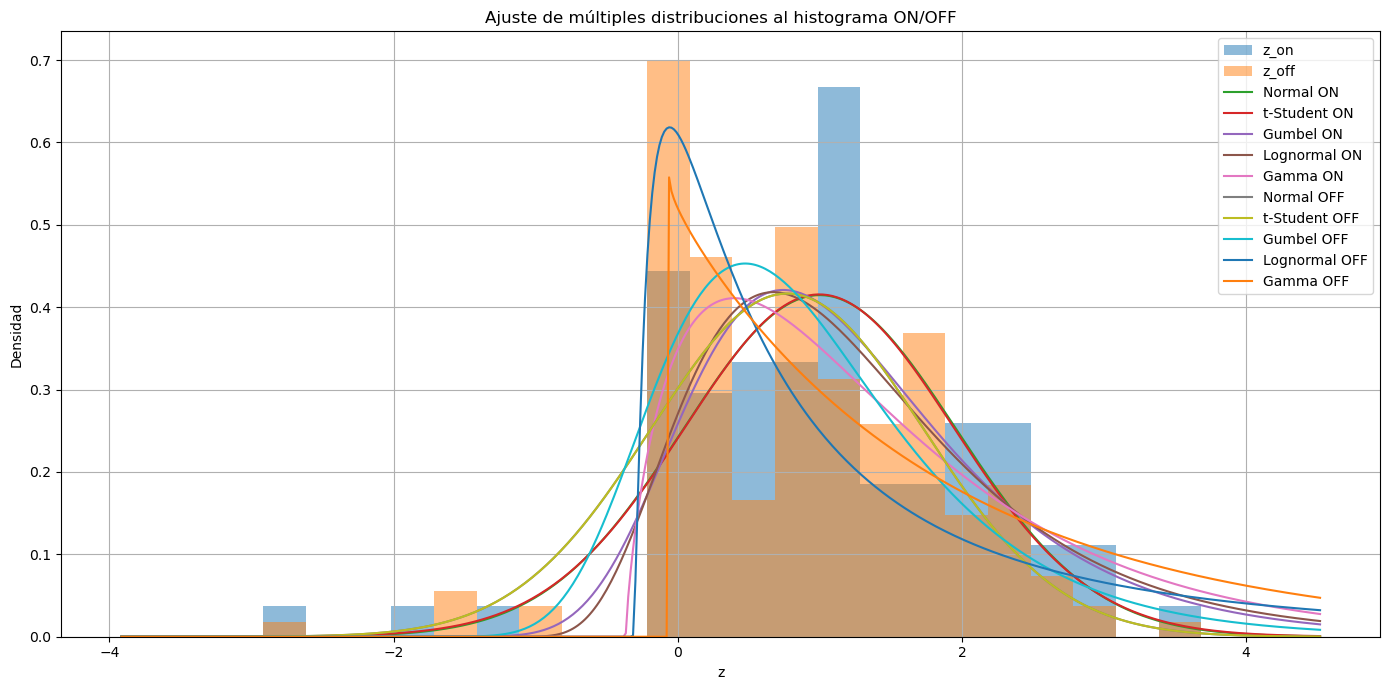

In [34]:
# Re-import necessary libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, t, gumbel_r, lognorm, gamma

# # Simulated input data for demonstration
# np.random.seed(0)
# z_on = np.random.normal(loc=1, scale=1, size=100)
# z_off = np.random.normal(loc=0.5, scale=1, size=100)

# Define binning
bin_width = 0.3
bins_on = np.arange(min(z_on), max(z_on) + bin_width, bin_width)
bins_off = np.arange(min(z_off), max(z_off) + bin_width, bin_width)

# Calculate histogram and centers
hist_on, edges_on = np.histogram(z_on, bins=bins_on, density=True)
centers_on = 0.5 * (edges_on[1:] + edges_on[:-1])
hist_off, edges_off = np.histogram(z_off, bins=bins_off, density=True)
centers_off = 0.5 * (edges_off[1:] + edges_off[:-1])

# Define PDF wrappers for each distribution
def normal_pdf(x, mu, sigma): return norm.pdf(x, loc=mu, scale=sigma)
def student_pdf(x, df, loc, scale): return t.pdf(x, df, loc=loc, scale=scale)
def gumbel_pdf(x, loc, scale): return gumbel_r.pdf(x, loc=loc, scale=scale)
def lognormal_pdf(x, s, loc, scale): return lognorm.pdf(x, s, loc=loc, scale=scale)
def gamma_pdf(x, a, loc, scale): return gamma.pdf(x, a, loc=loc, scale=scale)

# Fit and store parameters for each distribution
fit_results = {}

for name, pdf, centers, hist, p0 in [
    ("Normal", normal_pdf, centers_on, hist_on, [np.mean(z_on), np.std(z_on)]),
    ("t-Student", student_pdf, centers_on, hist_on, [5, np.mean(z_on), np.std(z_on)]),
    ("Gumbel", gumbel_pdf, centers_on, hist_on, [np.mean(z_on), np.std(z_on)]),
    ("Lognormal", lognormal_pdf, centers_on, hist_on, [1, 0, 1]),
    ("Gamma", gamma_pdf, centers_on, hist_on, [1, 0, 1]),
]:
    try:
        popt_on, _ = curve_fit(pdf, centers, hist, p0=p0, maxfev=10000)
        fit_results[name + " ON"] = (pdf, popt_on)
    except RuntimeError:
        fit_results[name + " ON"] = None

for name, pdf, centers, hist, p0 in [
    ("Normal", normal_pdf, centers_off, hist_off, [np.mean(z_off), np.std(z_off)]),
    ("t-Student", student_pdf, centers_off, hist_off, [5, np.mean(z_off), np.std(z_off)]),
    ("Gumbel", gumbel_pdf, centers_off, hist_off, [np.mean(z_off), np.std(z_off)]),
    ("Lognormal", lognormal_pdf, centers_off, hist_off, [1, 0, 1]),
    ("Gamma", gamma_pdf, centers_off, hist_off, [1, 0, 1]),
]:
    try:
        popt_off, _ = curve_fit(pdf, centers, hist, p0=p0, maxfev=10000)
        fit_results[name + " OFF"] = (pdf, popt_off)
    except RuntimeError:
        fit_results[name + " OFF"] = None

# Visualization
x_vals = np.linspace(min(min(z_on), min(z_off)) - 1, max(max(z_on), max(z_off)) + 1, 500)
plt.figure(figsize=(14, 7))
plt.hist(z_on, bins=bins_on, density=True, alpha=0.5, label="z_on")
plt.hist(z_off, bins=bins_off, density=True, alpha=0.5, label="z_off")

for name, result in fit_results.items():
    if result is not None:
        pdf, popt = result
        print(pdf)
        plt.plot(x_vals, pdf(x_vals, *popt), label=name)

plt.xlabel("z")
plt.ylabel("Densidad")
plt.title("Ajuste de múltiples distribuciones al histograma ON/OFF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
p_val=norm.cdf(2.72)
-norm.isf(p_val)

2.7200000000000046

In [24]:
from scipy.stats import chi2, norm, t, gumbel_r, lognorm, gamma
import pandas as pd

# Diccionario de CDFs correspondientes
cdf_funcs = {
    "Normal": norm.cdf,
    "t-Student": t.cdf,
    "Gumbel": gumbel_r.cdf,
    "Lognormal": lognorm.cdf,
    "Gamma": gamma.cdf
}

# Lista para almacenar resultados
fisher_extended_results = []

# Iterar sobre ON y OFF
for label in ["ON", "OFF"]:
    z_data = z_on if label == "ON" else z_off

    for name, result in fit_results.items():
        if result is None or label not in name:
            continue

        dist_name = name.replace(f" {label}", "")
        pdf_func, params = result

        # Obtener la función CDF ajustada
        cdf_func = cdf_funcs.get(dist_name)
        if cdf_func is None:
            continue

        try:
            # Calcular p-valores
            pvals = 1 - cdf_func(z_data, *params)
            pvals = np.clip(pvals, 1e-10, 1)  # evitar log(0)
        except Exception as e:
            print(f"Error en {dist_name} {label}: {e}")
            continue

        # Fisher
        chi2_val = -2 * np.sum(np.log(pvals))
        df = 2 * len(pvals)
        p_comb = 1- chi2.cdf(chi2_val, df)
        sigma_comb = norm.isf(p_comb)
        crit_val = chi2.ppf(1 - norm.cdf(2), df)

        fisher_extended_results.append({
            "Distribución": dist_name,
            "Región": label,
            "Grados de libertad": df,
            "Chi²": chi2_val,
            "Valor crítico (2σ)": crit_val,
            "p_comb": p_comb,
            "Significancia (σ)": sigma_comb
        })

# Convertir a DataFrame
fisher_df = pd.DataFrame(fisher_extended_results)
fisher_df


,Distribución,Región,Grados de libertad,Chi²,Valor crítico (2σ),p_comb,Significancia (σ)
0,Normal,ON,180,192.034052,144.086063,0.256042,0.655597
1,t-Student,ON,180,191.620074,144.086063,0.262816,0.634689
2,Gumbel,ON,180,153.191306,144.086063,0.927067,-1.454292
3,Lognormal,ON,180,146.724912,144.086063,0.967079,-1.839496
4,Gamma,ON,180,138.615049,144.086063,0.990339,-2.339242
5,Normal,OFF,362,392.769683,310.209429,0.127712,1.137272
6,t-Student,OFF,362,392.769959,310.209429,0.127710,1.137282
7,Gumbel,OFF,362,338.994608,310.209429,0.802029,-0.848889
8,Lognormal,OFF,362,260.878645,310.209429,0.999984,-4.153799
9,Gamma,OFF,362,189.817771,310.209429,1.000000,-7.818891


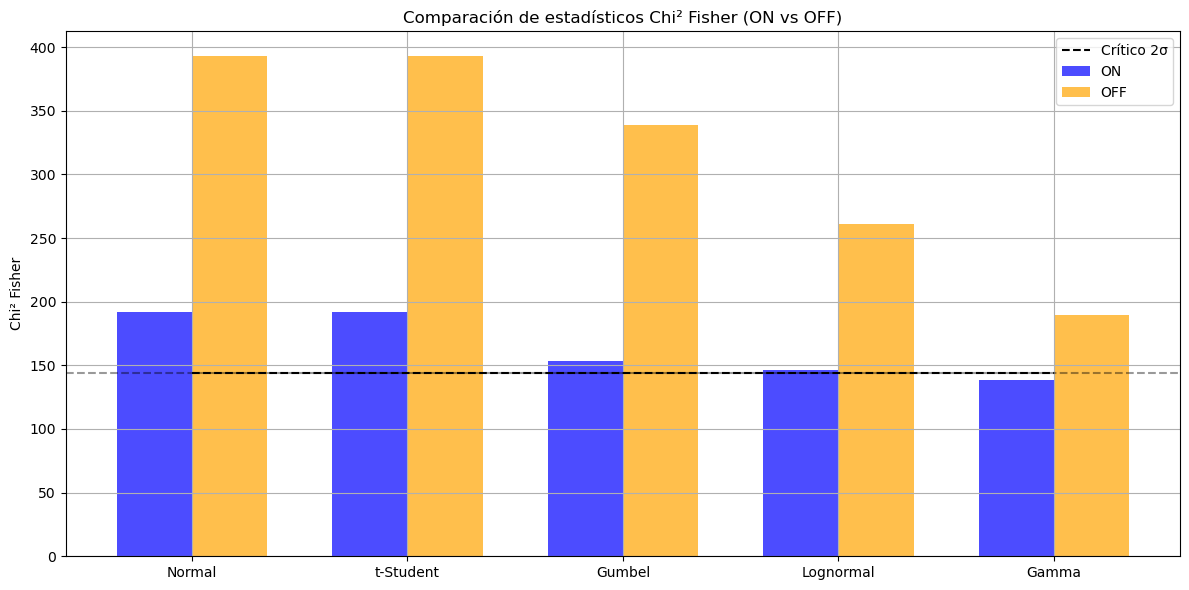

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener cargado el DataFrame `fisher_df` con columnas:
# 'Distribución', 'Región', 'Chi²', 'Valor crítico (3σ)'

# Obtener nombres únicos de distribuciones
dist_names = fisher_df['Distribución'].unique()
x = np.arange(len(dist_names))  # Posiciones en eje x
bar_width = 0.35

# Extraer valores para ON y OFF
chi2_on = fisher_df[fisher_df['Región'] == 'ON']['Chi²'].values
chi2_off = fisher_df[fisher_df['Región'] == 'OFF']['Chi²'].values
crit_vals = fisher_df[fisher_df['Región'] == 'ON']['Valor crítico (2σ)'].values

# Graficar barras Chi²
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, chi2_on, width=bar_width, label='ON', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, chi2_off, width=bar_width, label='OFF', color='orange', alpha=0.7)
plt.plot(x, crit_vals, 'k--', label='Crítico 2σ')

# Estética
plt.xticks(x, dist_names)
plt.ylabel("Chi² Fisher")
plt.title("Comparación de estadísticos Chi² Fisher (ON vs OFF)")
plt.axhline(y=crit_vals[0], color='k', linestyle='--', alpha=0.4)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


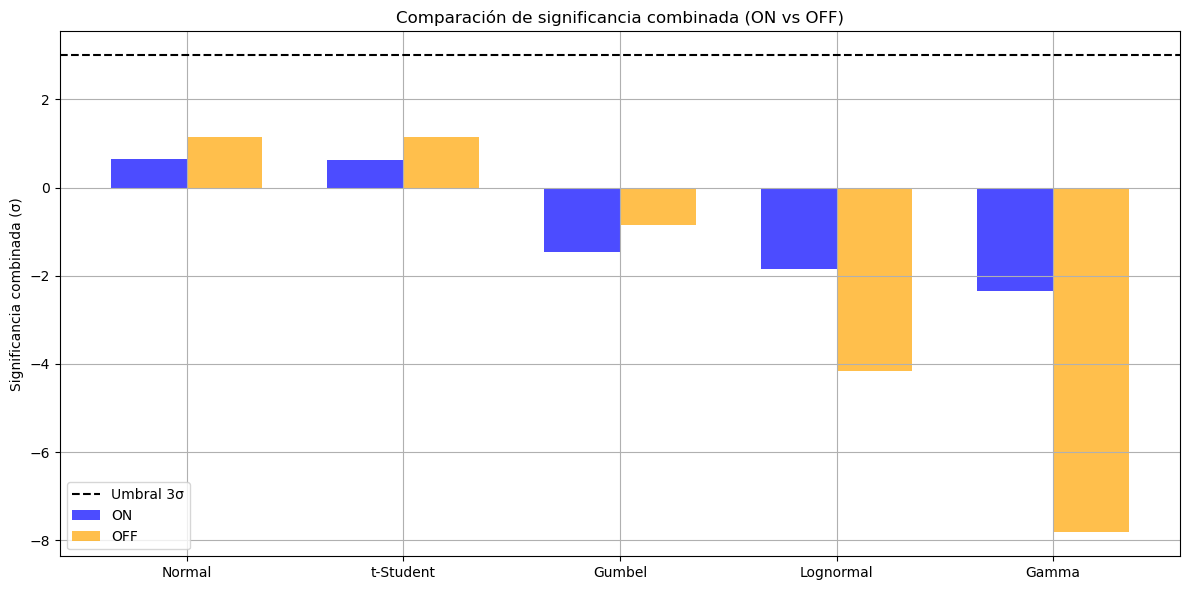

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer distribuciones y valores
dist_names = fisher_df['Distribución'].unique()
x = np.arange(len(dist_names))  # Eje X
bar_width = 0.35

# Valores de significancia ON y OFF
sig_on = fisher_df[fisher_df['Región'] == 'ON']['Significancia (σ)'].values
sig_off = fisher_df[fisher_df['Región'] == 'OFF']['Significancia (σ)'].values

# Línea de detección común (3σ)
sig_threshold = 3.0

# Graficar barras
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, sig_on, width=bar_width, label='ON', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, sig_off, width=bar_width, label='OFF', color='orange', alpha=0.7)
plt.axhline(sig_threshold, color='k', linestyle='--', label='Umbral 3σ')

# Etiquetas y estilo
plt.xticks(x, dist_names)
plt.ylabel("Significancia combinada (σ)")
plt.title("Comparación de significancia combinada (ON vs OFF)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Chi² empírico: 217.42
p empírico total: 0.00022
Significancia empírica (σ): 3.51


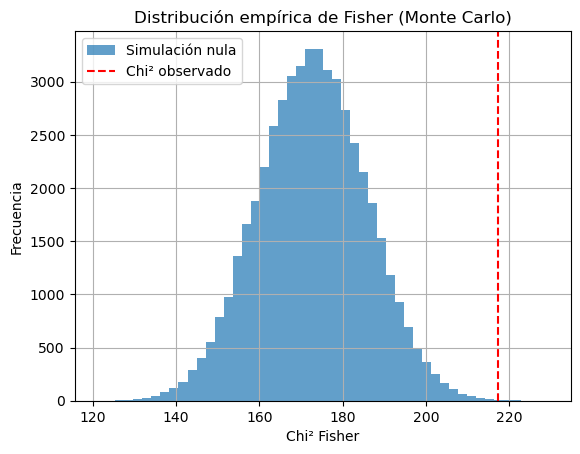

In [27]:

# Simulación de Monte Carlo con 50,000 muestras
def empirical_p(z, background):
    return np.array([np.sum(background >= zi) / len(background) for zi in z])

p_emp = empirical_p(z_on, z_off)
chi_obs_emp = -2 * np.sum(np.log(p_emp))

n_reps = 50000
chi_null = np.zeros(n_reps)
for i in range(n_reps):
    sample = np.random.choice(z_off, size=len(z_on), replace=False)
    p_sample = empirical_p(sample, z_off)
    chi_null[i] = -2 * np.sum(np.log(p_sample))

p_emp_mc = np.mean(chi_null >= chi_obs_emp)
sig_emp_mc = norm.isf(p_emp_mc)

print(f"Chi² empírico: {chi_obs_emp:.2f}")
print(f"p empírico total: {p_emp_mc:.5f}")
print(f"Significancia empírica (σ): {sig_emp_mc:.2f}")

plt.hist(chi_null, bins=50, alpha=0.7, label="Simulación nula")
plt.axvline(chi_obs_emp, color="red", linestyle="--", label="Chi² observado")
plt.xlabel("Chi² Fisher")
plt.ylabel("Frecuencia")
plt.title("Distribución empírica de Fisher (Monte Carlo)")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from scipy.stats import chi2, norm, t, gumbel_r, lognorm, gamma
import pandas as pd

# Diccionario de CDFs correspondientes
cdf_funcs = {
    "Normal": norm.cdf,
    "t-Student": t.cdf,
    "Gumbel": gumbel_r.cdf,
    "Lognormal": lognorm.cdf,
    "Gamma": gamma.cdf
}

# Lista para almacenar resultados
fisher_extended_results = []

# Iterar sobre ON y OFF
for label in ["ON", "OFF"]:
    z_data = z_on if label == "ON" else z_off

    for name, result in fit_results.items():
        if result is None or label not in name:
            continue

        dist_name = name.replace(f" {label}", "")
        pdf_func, params = result

        # Obtener la función CDF ajustada
        cdf_func = cdf_funcs.get(dist_name)
        if cdf_func is None:
            continue

        try:
            # Calcular p-valores
            pvals = 1 - cdf_func(z_data, *params)
            pvals = np.clip(pvals, 1e-10, 1)  # evitar log(0)
        except Exception as e:
            print(f"Error en {dist_name} {label}: {e}")
            continue

        # Fisher
        chi2_val = -2 * np.sum(np.log(pvals))
        df = 2 * len(pvals)
        p_comb = 1 - chi2.cdf(chi2_val, df)
        sigma_comb = norm.isf(p_comb)
        crit_val = chi2.ppf(1 - norm.cdf(3), df)

        fisher_extended_results.append({
            "Distribución": dist_name,
            "Región": label,
            "Grados de libertad": df,
            "Chi²": chi2_val,
            "Valor crítico (3σ)": crit_val,
            "p_comb": p_comb,
            "Significancia (σ)": sigma_comb
        })

# Convertir a DataFrame
fisher_df = pd.DataFrame(fisher_extended_results)
fisher_df


,Distribución,Región,Grados de libertad,Chi²,Valor crítico (3σ),p_comb,Significancia (σ)
0,Normal,ON,180,192.034052,128.368752,0.256042,0.655597
1,t-Student,ON,180,191.620074,128.368752,0.262816,0.634689
2,Gumbel,ON,180,153.191306,128.368752,0.927067,-1.454292
3,Lognormal,ON,180,146.724912,128.368752,0.967079,-1.839496
4,Gamma,ON,180,138.615049,128.368752,0.990339,-2.339242
5,Normal,OFF,362,392.769683,286.582686,0.127712,1.137272
6,t-Student,OFF,362,392.769959,286.582686,0.127710,1.137282
7,Gumbel,OFF,362,338.994608,286.582686,0.802029,-0.848889
8,Lognormal,OFF,362,260.878645,286.582686,0.999984,-4.153799
9,Gamma,OFF,362,189.817771,286.582686,1.000000,-7.818891


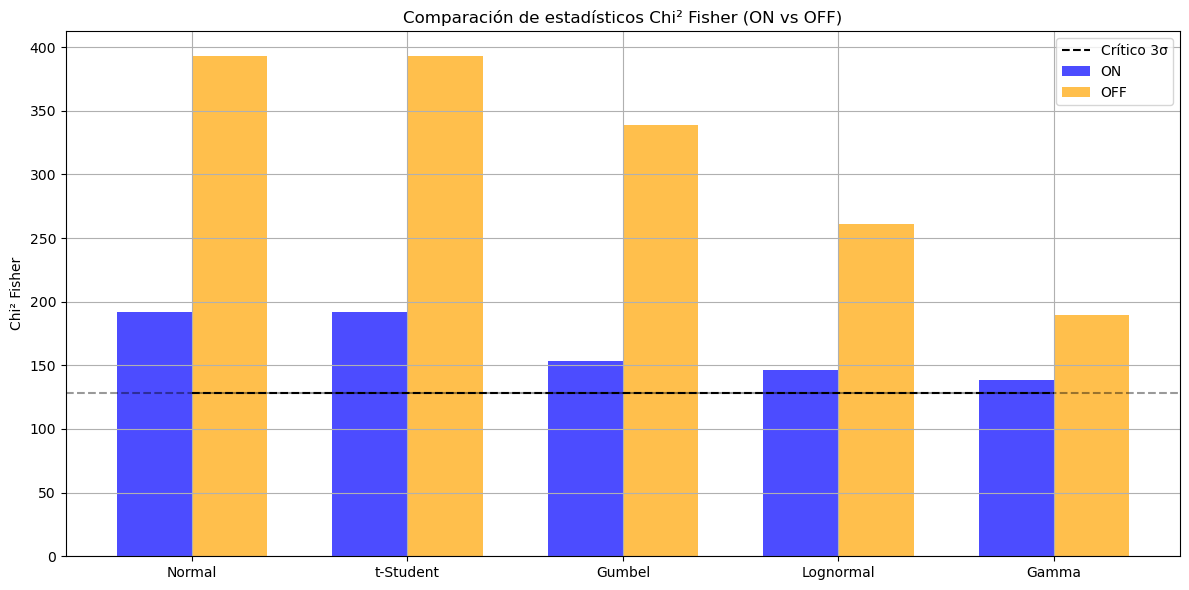

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener cargado el DataFrame `fisher_df` con columnas:
# 'Distribución', 'Región', 'Chi²', 'Valor crítico (3σ)'

# Obtener nombres únicos de distribuciones
dist_names = fisher_df['Distribución'].unique()
x = np.arange(len(dist_names))  # Posiciones en eje x
bar_width = 0.35

# Extraer valores para ON y OFF
chi2_on = fisher_df[fisher_df['Región'] == 'ON']['Chi²'].values
chi2_off = fisher_df[fisher_df['Región'] == 'OFF']['Chi²'].values
crit_vals = fisher_df[fisher_df['Región'] == 'ON']['Valor crítico (3σ)'].values

# Graficar barras Chi²
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, chi2_on, width=bar_width, label='ON', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, chi2_off, width=bar_width, label='OFF', color='orange', alpha=0.7)
plt.plot(x, crit_vals, 'k--', label='Crítico 3σ')

# Estética
plt.xticks(x, dist_names)
plt.ylabel("Chi² Fisher")
plt.title("Comparación de estadísticos Chi² Fisher (ON vs OFF)")
plt.axhline(y=crit_vals[0], color='k', linestyle='--', alpha=0.4)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


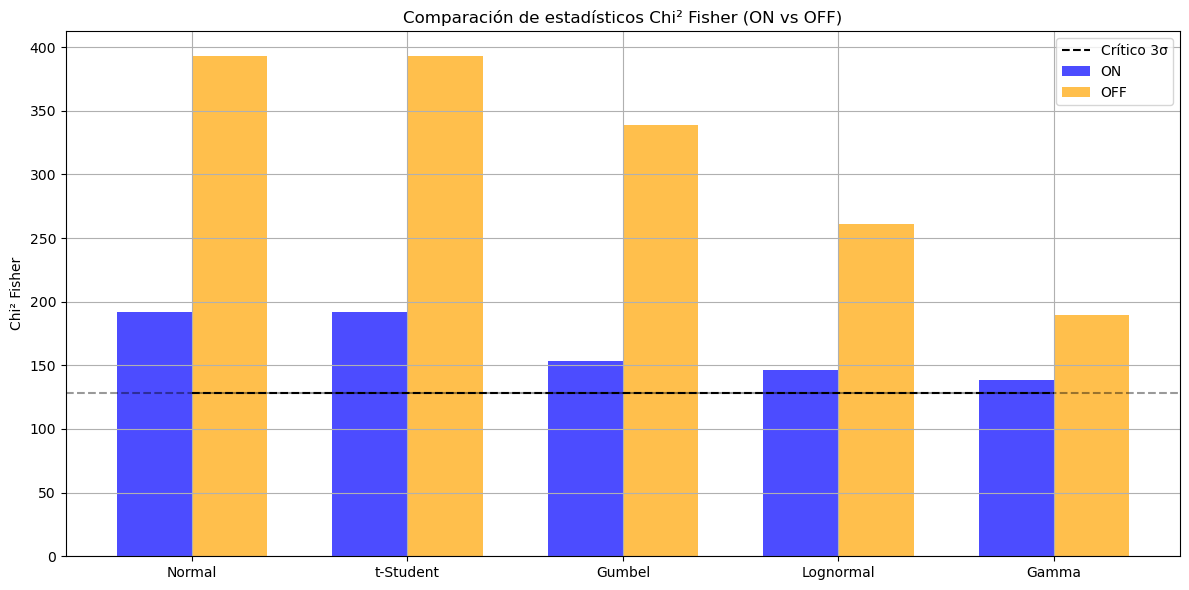

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener cargado el DataFrame `fisher_df` con columnas:
# 'Distribución', 'Región', 'Chi²', 'Valor crítico (3σ)'

# Obtener nombres únicos de distribuciones
dist_names = fisher_df['Distribución'].unique()
x = np.arange(len(dist_names))  # Posiciones en eje x
bar_width = 0.35

# Extraer valores para ON y OFF
chi2_on = fisher_df[fisher_df['Región'] == 'ON']['Chi²'].values
chi2_off = fisher_df[fisher_df['Región'] == 'OFF']['Chi²'].values
crit_vals = fisher_df[fisher_df['Región'] == 'ON']['Valor crítico (3σ)'].values

# Graficar barras Chi²
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, chi2_on, width=bar_width, label='ON', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, chi2_off, width=bar_width, label='OFF', color='orange', alpha=0.7)
plt.plot(x, crit_vals, 'k--', label='Crítico 3σ')

# Estética
plt.xticks(x, dist_names)
plt.ylabel("Chi² Fisher")
plt.title("Comparación de estadísticos Chi² Fisher (ON vs OFF)")
plt.axhline(y=crit_vals[0], color='k', linestyle='--', alpha=0.4)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
